### 分析一下数据之间的相关性, 并用曲线拟合 QP - {R,D} 关系

#### 1. 直观绘制一下曲线 (qp - {R,D})

In [25]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',  # 使用衬线字体
    'font.serif': ['Times New Roman'],  # 指定 Times New Roman 字体
    'font.size': 12,
    'text.usetex': False,
    'axes.labelsize': 13,
    'axes.titlesize': 15,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 11,
    'legend.title_fontsize': 12,
    'savefig.bbox': 'tight',
    # 'lines.linewidth': 2,
    # 'lines.markersize': 6,
    # 'grid.linewidth': 1,
    # 'axes.linewidth': 1
})

sns.set_style("whitegrid")
flierprops = dict(marker='o', markersize=3, linestyle='none')

In [26]:
import pandas as pd
import numpy as np

size_map = {
    "2160P": "3840x2160",
    "1080P": "1920x1080",
    "720P": "1280x720",
    "540P": "960x540",
    "360P": "640x360",
}
fig_dir = "/home/zhaoy/asset-fastCAE/results/vvenc/figs"
table_dir = "/home/zhaoy/asset-fastCAE/results/vvenc/tables"
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(table_dir, exist_ok=True)

In [27]:
enc_df = pd.read_csv(f"{table_dir}/encInfo.csv")
for col in ["psnr", "ssim", "bitrate", "vmaf"]:
    enc_df[f"log2{col}"] = np.log2(enc_df[col])

fps = 30.0
enc_df["bpp"] = enc_df.apply(lambda x: x["bitrate"] * 1000.0 / (fps * np.prod(list(map(float, size_map[x["size"]].split("x"))))), axis=1)
display(enc_df)

enc_df.to_csv(f"{table_dir}/encInfo.csv", index=False)

,seqName,sceneId,qp,preset,size,nframes,bitrate,psnr,ssim,vmaf,log2psnr,log2ssim,log2bitrate,log2vmaf,bpp
0,Lecture-1033,0,32,faster,360P,281,57.8571,47.754628,0.997213,95.285921,5.577569,-0.004026,5.854422,6.574191,0.008371
1,Lecture-1033,2,27,faster,360P,285,190.5078,49.755053,0.995836,95.477799,5.636771,-0.006020,7.573706,6.577093,0.027562
2,Lecture-1033,1,42,faster,360P,35,39.2434,42.998857,0.988553,89.363645,5.426226,-0.016610,5.294378,6.481616,0.005678
3,Lecture-1033,0,42,slower,360P,281,27.5214,45.618843,0.996147,92.773328,5.511558,-0.005570,4.782482,6.535638,0.003982
4,Lecture-1033,1,47,medium,360P,35,25.6114,41.168286,0.985997,85.511415,5.363461,-0.020345,4.678714,6.418045,0.003705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25019,Lecture-07e0,1,32,slower,1080P,67,546.9027,44.441940,0.994804,96.029980,5.473850,-0.007515,9.095140,6.585413,0.008792
25020,Lecture-07e0,1,37,slower,1080P,67,356.4824,41.881493,0.992692,93.635918,5.388241,-0.010582,8.477687,6.548990,0.005730
25021,Lecture-07e0,1,47,faster,1080P,67,174.2794,34.529403,0.970901,74.917759,5.109753,-0.042604,7.445258,6.227236,0.002802
25022,Lecture-07e0,1,52,faster,1080P,67,107.3409,30.605672,0.946040,56.786558,4.935727,-0.080027,6.746056,5.827478,0.001726


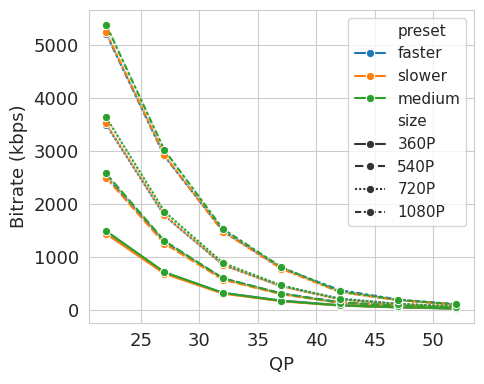

In [28]:
# 1. qp - bitrate : 幂函数
plt.figure(figsize=(5,4))
sns.lineplot(data=enc_df, x="qp", y="bitrate", hue="preset", style="size", marker="o", errorbar=("ci", 0))

plt.xlabel("QP")
plt.ylabel("Bitrate (kbps)")
plt.legend(loc="upper right")

plt.tight_layout()
plt.savefig(f"{fig_dir}/corrs/qp-bitrate.png", dpi=400)

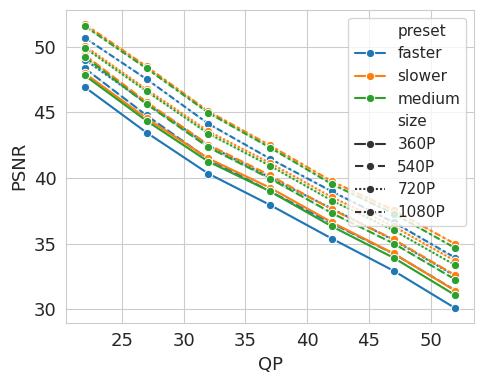

In [29]:
# 2. qp - psnr : 线性函数
plt.figure(figsize=(5,4))
sns.lineplot(data=enc_df, x="qp", y="psnr", hue="preset", style="size", marker="o", errorbar=("ci", 0))

plt.xlabel("QP")
plt.ylabel("PSNR")
plt.legend(loc="upper right")

plt.tight_layout()
plt.savefig(f"{fig_dir}/corrs/qp-psnr.png", dpi=400)

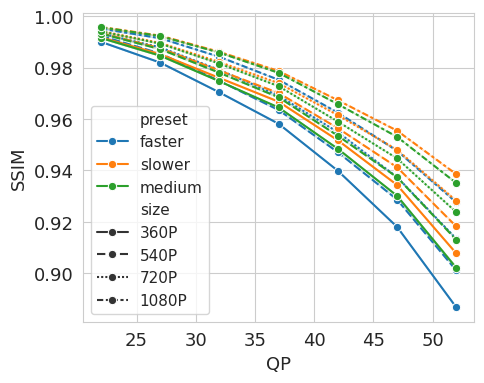

In [30]:
# 3. qp - ssim : 二次函数
plt.figure(figsize=(5,4))
sns.lineplot(data=enc_df, x="qp", y="ssim", hue="preset", style="size", marker="o", errorbar=("ci", 0))

plt.xlabel("QP")
plt.ylabel("SSIM")
plt.legend(loc="lower left")

plt.tight_layout()
plt.savefig(f"{fig_dir}/corrs/qp-ssim.png", dpi=400)

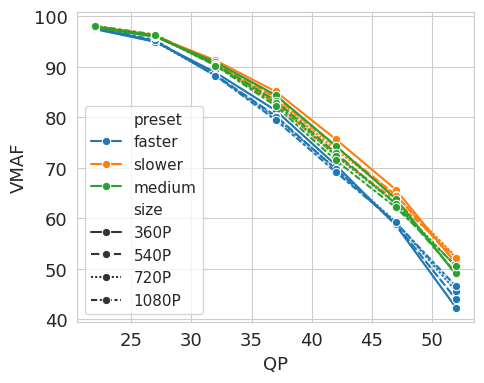

In [31]:
# 4. qp - vmaf : 二次函数
plt.figure(figsize=(5,4))
sns.lineplot(data=enc_df, x="qp", y="vmaf", hue="preset", style="size", marker="o", errorbar=("ci", 0))

plt.xlabel("QP")
plt.ylabel("VMAF")
plt.legend(loc="lower left")

plt.tight_layout()
plt.savefig(f"{fig_dir}/corrs/qp-vmaf.png", dpi=400)

#### 2. 计算一下相关系数

In [38]:
# 1. 同一指标, 不同 preset 之间的相关性
import pandas as pd
targets = ["log2bitrate", "log2psnr", "log2ssim", "log2vmaf", "bitrate", "psnr", "ssim", "vmaf"]

enc_df = pd.read_csv(f"{table_dir}/encInfo.csv")
src_df = enc_df[enc_df.preset == "faster"].reset_index(drop=True)

rows = []
for preset in enc_df.preset.unique():
    dst_df = enc_df[enc_df.preset == preset].reset_index(drop=True)
    for target in targets:
        corr = src_df[target].corr(dst_df[target])
        rows.append([preset, target, corr])

corr_df = pd.DataFrame(rows, columns=["preset", "target", "corr"])
corr_df["preset"] = corr_df["preset"].astype("object")

display(corr_df)        # 直接算的话, 跨 preset 相关性很低

,preset,target,corr
0,faster,log2bitrate,1.000000
1,faster,log2psnr,1.000000
2,faster,log2ssim,1.000000
3,faster,log2vmaf,1.000000
4,faster,bitrate,1.000000
5,faster,psnr,1.000000
6,faster,ssim,1.000000
7,faster,vmaf,1.000000
8,slower,log2bitrate,0.265000
9,slower,log2psnr,0.404916


In [39]:
# 尝试一下函数拟合 (对每个 preset, 都拟合一条 QP-{R,D} 曲线)
from utils import func_linear, func_pw2, func_quad3, func_quad2
from tqdm import tqdm
from scipy.optimize import curve_fit

funcs = [func_linear, func_pw2, func_quad2, func_quad3]
targets = ["log2bitrate", "log2psnr", "log2ssim", "log2vmaf", "bitrate", "psnr", "ssim", "vmaf"]

rows = []
verbose = True
for preset in enc_df["preset"].unique():
    preset_df = enc_df[enc_df.preset == preset].reset_index(drop=True)
    
    for seqName in tqdm(preset_df["seqName"].unique()):
        for sceneId in preset_df["sceneId"].unique():
            seq_df = preset_df[(preset_df.seqName == seqName) & (preset_df.sceneId == sceneId)].reset_index(drop=True)
            
            r2_scores = []
            for size in seq_df["size"].unique():
                df = seq_df[seq_df["size"] == size].reset_index(drop=True)
                x = df["qp"]
                
                for target in targets:
                    y = df[target]
                        
                    for func in funcs:
                        try:
                            popt, pconv = curve_fit(f=func, xdata=x, ydata=y, full_output=False, maxfev=3000)
                            pred_value = func(x, *popt)
                            abs_error  = pred_value - y
                            
                            r2 = 1.0 - (np.var(abs_error) / np.var(y))
                            r2_scores.append(r2)
                            rows.append(
                                [seqName, sceneId, preset, size, tuple(popt), 
                                 func.__name__.replace("func_", "").replace("pw2", "power").replace("quad", "quadratic"), target, r2]  + y.tolist()[:5])
                            
                            if verbose:
                                print(
                                    [seqName, sceneId, preset, size, tuple(popt), 
                                     func.__name__.replace("func_", "").replace("pw2", "power").replace("quad", "quadratic"), target, r2] + y.tolist()[:5])
                                verbose = False
                
                        except Exception as e:
                            print(f"{e} (seqName={seqName}, sceneId={sceneId}, size={size} func={func.__name__})")
                            continue

cols = ["seqName", "sceneId", "preset", "size", "popt", "func", "target", "r2"] + [f"y{i}" for i in range(5)]
r2_scores_df = pd.DataFrame(rows, columns=cols)

display(r2_scores_df)
r2_scores_df.to_csv(f"{table_dir}/corrs.csv", index=False)

  0%|          | 0/45 [00:00<?, ?it/s]

['Lecture-1033', 0, 'faster', '360P', (-0.12963176468923399, 10.361045692466279), 'linear', 'log2bitrate', 0.9682368881217931, 5.854422107050994, 5.454981918633098, 7.929725322359941, 4.8338514904021865, 4.325825316354064]


100%|██████████| 45/45 [04:16<00:00,  5.71s/it]


,seqName,sceneId,preset,size,popt,func,target,r2,y0,y1,y2,y3,y4
0,Lecture-1033,0,faster,360P,"(-0.12963176468923399, 10.361045692466279)",linear,log2bitrate,0.968237,5.854422,5.454982,7.929725,4.833851,4.325825
1,Lecture-1033,0,faster,360P,"(93.86765201098036, -0.7983658747990869)",power,log2bitrate,0.993089,5.854422,5.454982,7.929725,4.833851,4.325825
2,Lecture-1033,0,faster,360P,"(-0.0016967066194886193, 8.057132419870154)",quadratic2,log2bitrate,0.920754,5.854422,5.454982,7.929725,4.833851,4.325825
3,Lecture-1033,0,faster,360P,"(0.0023244287200517855, -0.301639490134483, 13...",quadratic3,log2bitrate,0.991585,5.854422,5.454982,7.929725,4.833851,4.325825
4,Lecture-1033,0,faster,360P,"(-0.014979963183525197, 6.05468385835486)",linear,log2psnr,0.968679,5.577569,5.529331,5.706295,5.461330,5.363440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114427,Lecture-07e0,0,medium,1080P,"(-3.7297940397007544e-05, 0.001800459499781705...",quadratic3,ssim,0.988761,0.985206,0.978482,0.965945,0.992771,0.996956
114428,Lecture-07e0,0,medium,1080P,"(-1.3925656518041216, 134.1325951655555)",linear,vmaf,0.935698,79.372947,70.063180,55.605811,91.891914,98.648764
114429,Lecture-07e0,0,medium,1080P,"(534.4870632338494, -0.5257588424915697)",power,vmaf,0.819518,79.372947,70.063180,55.605811,91.891914,98.648764
114430,Lecture-07e0,0,medium,1080P,"(-0.019119633999175985, 110.69440839349525)",quadratic2,vmaf,0.979117,79.372947,70.063180,55.605811,91.891914,98.648764


In [40]:
def rm_outliers(df, cols, threshold=1.5, lower_only=True):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)

        if lower_only:
            df = df[df[col] >= lower_bound]
        else:
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [42]:
r2_scores_df = pd.read_csv(f"{table_dir}/corrs.csv")
display(r2_scores_df.describe())

r2_scores_df = rm_outliers(r2_scores_df, cols=["r2"])
display(r2_scores_df.describe())

r2_scores_df.isnull().values.any()  # NaN detection

,sceneId,r2,y0,y1,y2,y3,y4
count,114432.000000,114432.000000,114432.000000,114432.000000,114432.000000,114432.000000,114432.000000
mean,7.835570,0.937220,134.158946,132.119243,133.429149,135.314348,132.811538
std,9.022558,0.089923,640.026222,634.329823,638.201094,648.145473,656.030267
min,0.000000,0.444842,-0.827232,-0.598113,-0.572469,-1.598810,-3.824295
25%,1.000000,0.922456,0.999701,0.999727,0.999719,0.999628,0.999587
50%,4.000000,0.978455,6.574357,6.564620,6.565574,6.567649,6.564284
75%,11.000000,0.994172,47.277748,46.945805,46.992531,47.057760,46.846629
max,39.000000,0.999948,18685.740000,14945.925000,17367.667500,17032.005000,18865.095000


,sceneId,r2,y0,y1,y2,y3,y4
count,101070.000000,101070.000000,101070.000000,101070.000000,101070.000000,101070.000000,101070.000000
mean,8.101751,0.965238,92.723000,91.067811,92.921487,93.496672,91.866723
std,9.141927,0.043147,526.769724,513.077343,526.504705,528.536261,536.854344
min,0.000000,0.814891,-0.827232,-0.598113,-0.572469,-1.598810,-3.824295
25%,1.000000,0.953608,0.996929,0.996681,0.996781,0.996875,0.996461
50%,5.000000,0.983724,6.457756,6.443946,6.449745,6.446170,6.442571
75%,12.000000,0.995096,41.085000,41.004856,41.171139,41.188353,40.836875
max,39.000000,0.999948,18685.740000,14945.925000,17367.667500,17032.005000,18865.095000


False

In [28]:
r2_scores_df["func"].unique()

array(['linear', 'power', 'quadratic2', 'quadratic3'], dtype=object)

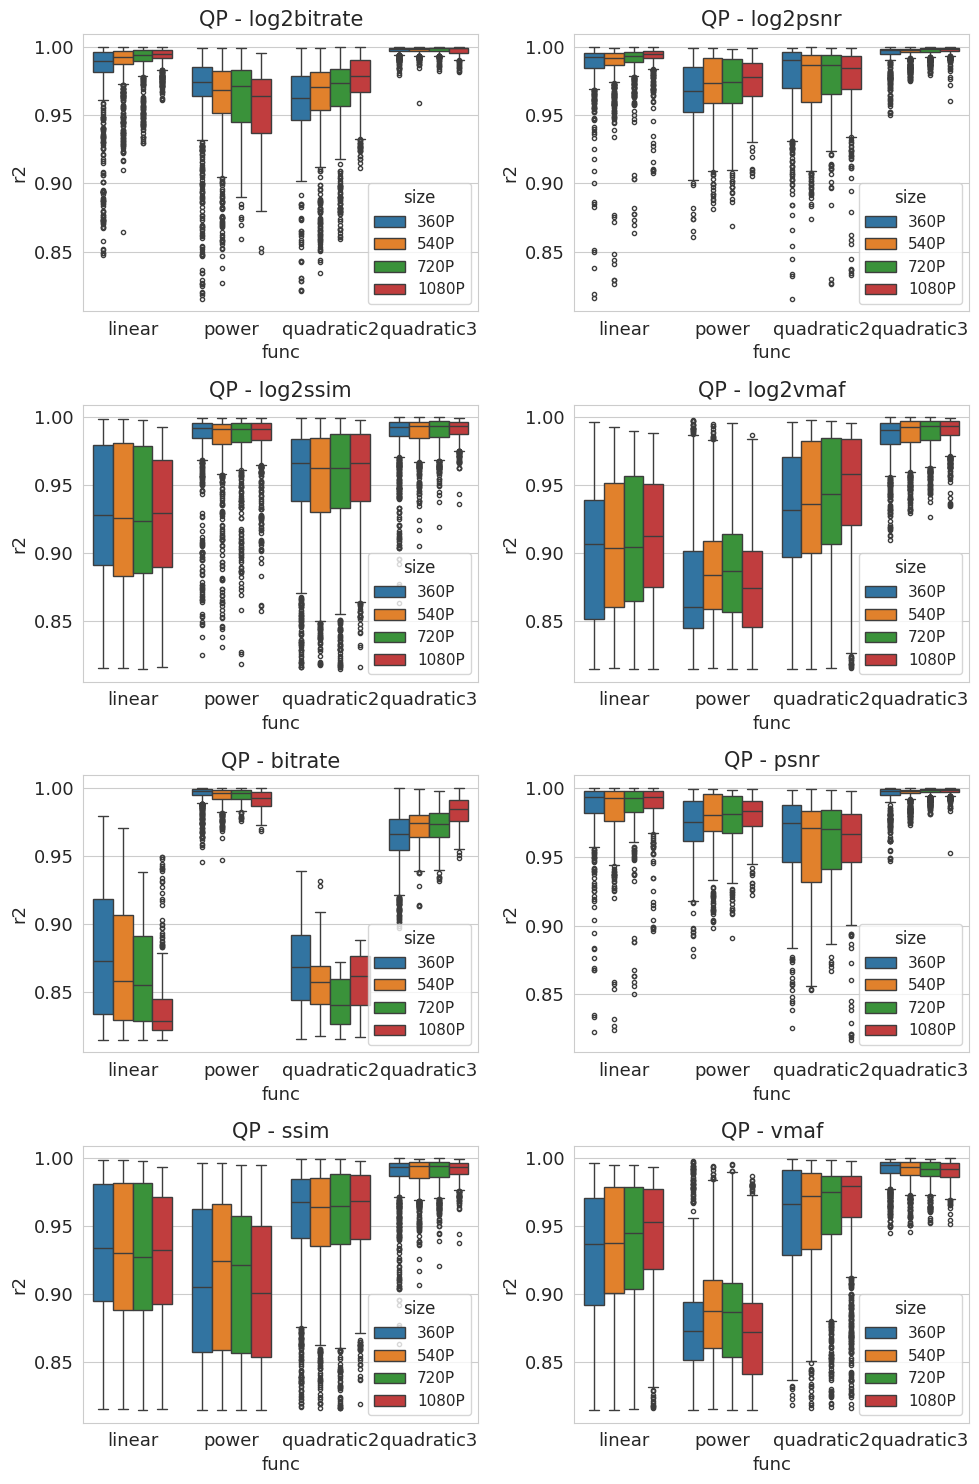

In [36]:
# 画一下不同函数拟合的结果
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.flatten()

for i, target in enumerate(["log2bitrate", "log2psnr", "log2ssim", "log2vmaf", "bitrate", "psnr", "ssim", "vmaf"]):
    ax = axes[i]
    sns.boxplot(data=r2_scores_df[r2_scores_df["target"] == target], x="func", y="r2", hue="size", ax=ax, order=["linear", "power", "quadratic2", "quadratic3"], flierprops=flierprops)
    ax.set_title(f"QP - {target}")

plt.tight_layout()
plt.savefig(f"{fig_dir}/corrs.png", dpi=400)

#### 各项指标预测最适合的函数

| 指标   | 是否需要取 log | 最适合的预测函数   |
| ------ | --------------- | ------------------ |
| bitrate | 是             | 二次函数           |
| psnr   | 都行            | 二次函数           |
| ssim   | 是             | 幂函数 / 二次函数  |
| vmaf   | 否             | 二次函数           |

#### 所以直接都用二次函数好了, 只有 vmaf 不取 log

In [100]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',  # 使用衬线字体
    'font.serif': ['Times New Roman'],  # 指定 Times New Roman 字体
    'font.size': 12,
    'text.usetex': False,
    'axes.labelsize': 14,
    'axes.titlesize': 15,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'figure.figsize': (6.4, 4.8),
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'grid.linewidth': 1,
    'axes.linewidth': 1
})

sns.set_style("whitegrid")
flierprops = dict(marker='o', markersize=3, linestyle='none')

In [105]:
r2_scores_df = pd.read_csv(f"{table_dir}/corrs.csv")
r2_scores_df = rm_outliers(r2_scores_df, cols=["r2"])
r2_scores_df["func"] = r2_scores_df["func"].str.replace("func_", "").replace("pw2", "power")

display(r2_scores_df.describe())
print(r2_scores_df["target"].unique())

,sceneId,r2
count,57064.000000,57064.000000
mean,8.171001,0.963849
std,9.174895,0.049827
min,0.000000,0.795416
25%,1.000000,0.957715
50%,5.000000,0.986400
75%,12.000000,0.995966
max,39.000000,0.999941


['log2bitrate' 'log2psnr' 'log2ssim' 'log2vmaf' 'bitrate' 'psnr' 'ssim'
 'vmaf']


In [108]:
""" 仔细把这个拟合关系图重新画一遍 """
for target in r2_scores_df["target"].unique():
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=r2_scores_df[r2_scores_df["target"] == target], x="func", y="r2", hue="size", flierprops=flierprops, palette="pastel", order=["linear", "power", "quadratic"])
    
    plt.title(f"Curve Fitting (QP - {target})")
    plt.xlabel("")
    plt.ylabel("R2")
    
    plt.tight_layout()
    plt.savefig(f"{fig_dir}/r2-QP-{target}.png", dpi=400)
    plt.close()

In [115]:
""" 分组计算 r2 的均值和方差"""
stats = r2_scores_df.groupby(["target", "func", "size", "preset"])["r2"].agg(["mean", "std"]).reset_index()
display(stats)

stats.to_csv(f"{table_dir}/r2-QP-target.csv", index=False)

,target,func,size,preset,mean,std
0,bitrate,linear,360P,faster,0.862260,0.052649
1,bitrate,linear,360P,medium,0.857466,0.051295
2,bitrate,linear,360P,slower,0.857323,0.052662
3,bitrate,linear,540P,faster,0.853738,0.047636
4,bitrate,linear,540P,medium,0.850551,0.045927
...,...,...,...,...,...,...
211,vmaf,quadratic,540P,medium,0.990760,0.008898
212,vmaf,quadratic,540P,slower,0.990469,0.009188
213,vmaf,quadratic,720P,faster,0.990884,0.008304
214,vmaf,quadratic,720P,medium,0.990406,0.008358


In [9]:
stats = pd.read_csv("/home/zhaoy/encCAE/fastCAE/results/vvenc/tables/r2-QP-target.csv")
display(stats.describe())

,mean,std
count,216.000000,216.000000
mean,0.954072,0.027874
std,0.046361,0.020525
min,0.839313,0.001978
25%,0.911481,0.012015
50%,0.978593,0.019708
75%,0.989448,0.051088
max,0.998070,0.068695
